### 8. Funções de múltiplas variáveis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exemplo 8.1:**

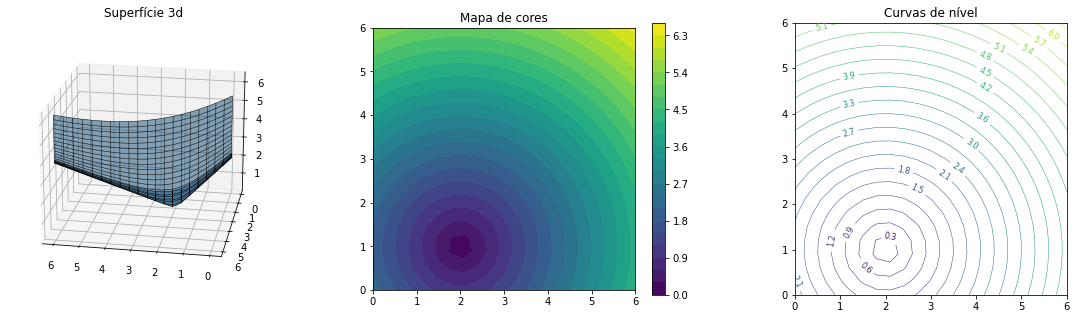

In [12]:
x = np.linspace(0, 6, 21)
y = np.linspace(0, 6, 21)
xi, yi = np.meshgrid(x, y)

d = lambda x,y: np.sqrt((x-2)**2 + (y-1)**2)
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(x, y, d(xi,yi), alpha=0.5)
ax.plot_wireframe(x, y, d(xi,yi), lw=0.5, color='black')
ax.view_init(20, 100)
plt.title('Superfície 3d')

ax = fig.add_subplot(132)
plt.contourf(x, y, d(xi,yi), 20)
plt.axis('scaled')
plt.colorbar()
plt.title('Mapa de cores')

ax = fig.add_subplot(133)
c = plt.contour(x, y, d(xi,yi),20, linewidths=0.5)
plt.clabel(c, inline=2, fontsize=8)
plt.axis('scaled')
plt.title('Curvas de nível')
plt.savefig("Exemplo8.1.png",dpi=300)
plt.show()

**Exemplo 8.2:**

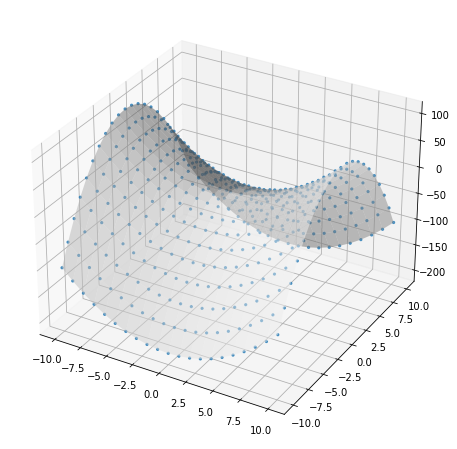

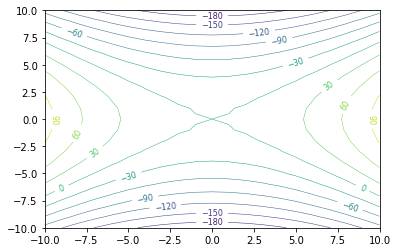

In [13]:
#cria a malha
x = np.linspace(-10, 10, 21)
y = np.linspace(-10, 10, 21)
x, y = np.meshgrid(x, y)

# define a função
f = lambda x,y: x**2 - 2*y**2
z = f(x,y)

#cria a figura
plt.figure(figsize=(8,8))

# plota
ax1 = fig.add_subplot(211)
ax1 = plt.axes(projection="3d")
ax1.scatter3D(x, y, z, 
             alpha=0.7,
             marker='.')
ax1.plot_surface(x, y, z, 
                color='whitesmoke',
                alpha=0.5)
plt.savefig("Exemplo8.2a.png",dpi=300)
plt.show()

ax2 = fig.add_subplot(212)
c = plt.contour(x, y, z, 10, 
            linewidths=0.5)
plt.clabel(c, inline=2, fontsize=8)
plt.savefig("Exemplo8.2b.png",dpi=300)
plt.show()

**Exemplo 8.3:** 

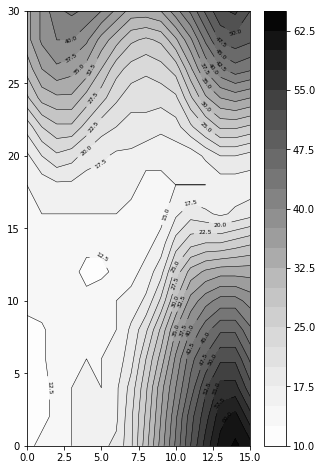

In [4]:
T = np.array([
[12,13,14,15,16,17,18,22,29,36,43,50,56,61,63,61],
[12,12,13,15,16,16,17,22,28,35,42,49,54,59,61,56],
[11,12,13,15,16,15,17,21,27,34,40,46,52,56,56,51],
[11,12,14,15,15,15,16,19,25,31,38,44,48,52,52,47],
[12,12,14,15,14,14,15,18,22,28,35,40,44,47,47,43],
[13,14,15,13,13,14,15,16,18,23,30,36,39,41,41,39],
[14,15,14,13,12,12,13,14,16,19,26,31,33,34,34,34],
[14,15,14,14,13,13,13,13,14,16,21,24,25,25,26,27],
[15,15,15,15,15,15,15,14,13,14,17,19,18,17,18,19],
[15,16,17,17,16,16,16,16,14,14,15,15,15,16,16,16],
[17,20,22,21,19,18,17,17,16,16,16,16,18,20,20,19],
[21,25,27,27,24,21,20,19,19,18,19,22,25,28,28,27],
[27,31,32,32,29,26,23,21,21,21,22,27,32,35,36,35],
[31,35,37,36,34,30,26,24,23,24,26,32,38,42,44,43],
[34,38,40,40,38,34,31,28,27,28,32,37,43,48,49,48],
[34,38,42,43,42,40,37,34,34,35,39,43,48,52,53,50]], 
dtype = float)

x = np.linspace(0, 15, 16)
y = np.linspace(0, 30, 16)
xi, yi = np.meshgrid(x, y)

fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(111)
plt.contourf(x, y, T, 20, cmap=plt.cm.Greys)
plt.colorbar()
c = plt.contour(x, y, T,20, linewidths=0.5,colors='k')
plt.clabel(c, inline=2, fontsize=6)
plt.savefig("Exemplo8.3.png",dpi=300)
plt.show()


**Exemplo 8.4:**

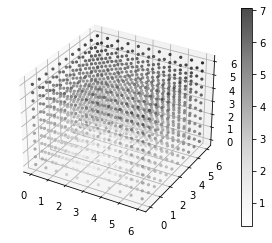

In [5]:
z = np.linspace(0, 6, 11)
x = np.linspace(0, 6, 11)
y = np.linspace(0, 6, 11)
xi, yi, zi = np.meshgrid(x, y, z)

d = lambda x,y,z: np.sqrt((x-3)**2+\
                          (y-2)**2+\
                          (z-1)**2)
# Creating figure
fig = plt.figure()
ax = plt.axes(projection="3d")

# Creating plot
sc = ax.scatter3D(xi, yi, zi, 
                  c=d(xi,yi,zi), 
                  alpha=0.7, marker='.',
                  cmap=plt.cm.Greys)
plt.colorbar(sc)
plt.savefig("Exemplo8.4a.png",dpi=300)
plt.show()

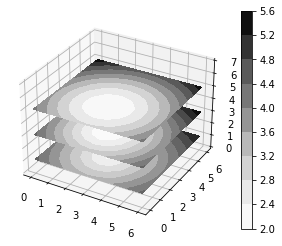

In [6]:
w = d(xi,yi,zi)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for z in [1,3,5]:
    c = ax.contourf(xi[:,:,z], yi[:,:,z], 
                    w[:,:,z], 10, 
                    zdir='z', offset=z,
                    cmap=plt.cm.Greys)
plt.colorbar(c)
ax.set_zlim((0.,7))
plt.savefig("Exemplo8.4b.png",dpi=300)
plt.show()

In [7]:
import plotly.graph_objects as go
import numpy as np

x,y,z = np.mgrid[0:6:21j, 0:6:21j, 0:6:21j]

# ellipsoid
values = np.sqrt((x-3)**2+\
                 (y-2)**2+\
                 (z-1)**2)

fig = go.Figure(data=go.Isosurface(
    x=x.flatten(),
    y=y.flatten(),
    z=z.flatten(),
    value=values.flatten(),
    #opacity=0.9,
    isomin=1,
    isomax=6,
    surface_count=10,
    colorbar_nticks=10,
    colorscale='Gray',
    caps=dict(x_show=False, y_show=False)
    ))
plt.savefig("Exemplo8.6.png",dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

**Exemplo 5:**

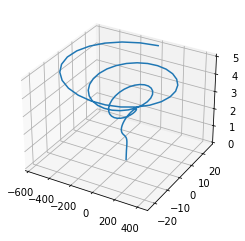

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Prepare arrays x, y, z
t = np.linspace(0, 8*np.pi, 100)
z = np.sqrt(t)
x = t**2 * np.sin(t)
y = t*np.cos(t)
z = np.sqrt(t)
ax.plot(x, y, z)
plt.savefig("Exemplo8.5.png",dpi=300)
plt.show()

**Exemplo 8.6:**

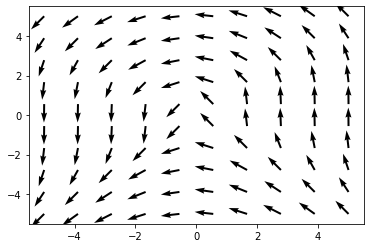

In [9]:
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)
xi,yi = np.meshgrid(x,y)

u = -yi**2/np.sqrt(xi**4 + yi**4)
v = xi/np.sqrt(xi**2 + yi**2)

#plt.streamplot(xi,yi,u,v)
plt.quiver(xi,yi,u,v)
plt.savefig("Exemplo8.6.png",dpi=300)
plt.show()

**Exemplo 8.7:**

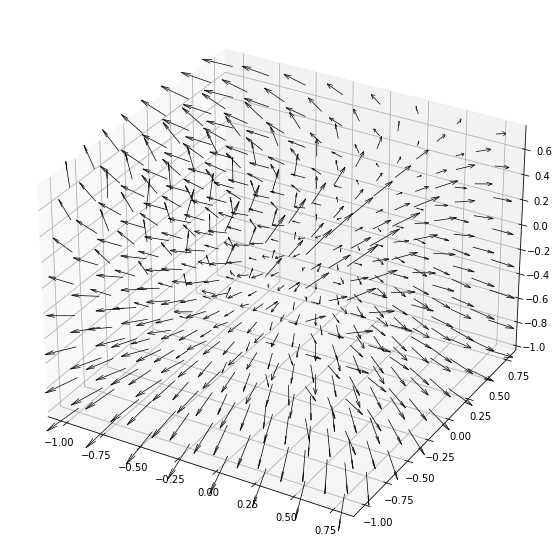

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

x,y,z = np.meshgrid(np.arange(-1, 1, 0.25),
                    np.arange(-1, 1, 0.25),
                    np.arange(-1, 1, 0.25))

u = np.sin(x) * np.cos(y*z)
v = -y*z
w = np.cos(x) * np.sin(z)

ax.quiver(x, y, z, u, v, w, 
          length=0.2, linewidths= 0.7,
          color = 'black')
plt.savefig("Exemplo8.7.png",dpi=300)
plt.show()